<a href="https://colab.research.google.com/github/ariefrachman17/proyek-01/blob/master/UAS_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
from google.colab import files

## 1. MENELAAH DATA (DATA UNDERSTANDING)

In [ ]:
uploaded = files.upload()

In [ ]:
df = pd.read_csv('Campus Recruitment.csv', sep = ";")

In [ ]:
df.head()

,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
0,1,M,67,Internasional,91,Internasional,Commerce,58,Sci&Tech,No,55,Mkt&HR,58.08.00,Placed,5400000.0
1,2,M,79.33.00,Negeri,78.33.00,Negeri,Science,77.48.00,Sci&Tech,Yes,86.05.00,Mkt&Fin,66.28.00,Placed,4000000.0
2,3,M,65,Negeri,68,Swasta,Arts,64,Comm&Mgmt,No,75,Mkt&Fin,57.08.00,Placed,5000000.0
3,4,M,56,Negeri,52,Swasta,Science,52,Sci&Tech,No,66,Mkt&HR,59.43.00,Not Placed,NaN
4,5,M,85.08.00,Negeri,73.06.00,Negeri,Commerce,73.03.00,Comm&Mgmt,No,96.08.00,Mkt&Fin,55.05.00,Placed,8500000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                215 non-null    int64  
 1   Jenis Kelamin                     214 non-null    object 
 2   Nilai rata-rata SMP               213 non-null    object 
 3   Lembaga pendidikan kelas 10       215 non-null    object 
 4   Nilai rata-rata SMA               214 non-null    object 
 5   Lembaga pendidikan kelas 12       215 non-null    object 
 6   Jurusan saat SMA                  215 non-null    object 
 7   IPK                               215 non-null    object 
 8   Program studi sarjana             215 non-null    object 
 9   Pengalaman kerja sebelum lulus    215 non-null    object 
 10  Nilai tes kemampuan kerja         209 non-null    object 
 11  Pendidikan pascasarjana           215 non-null    object 
 12  Nilai ra

In [ ]:
df.describe(include='all')

,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
count,215.000000,214,213,215,214,215,215,215,215,215,209,215,215,215,1.480000e+02
unique,NaN,4,102,3,97,3,3,89,3,2,97,2,204,2,NaN
top,NaN,M,63,Negeri,63,Negeri,Commerce,65,Comm&Mgmt,No,60,Mkt&Fin,56.07.00,Placed,NaN
freq,NaN,132,10,116,14,104,113,20,145,141,14,120,3,148,NaN
mean,108.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.773108e+06
std,62.209324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.869149e+06
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+06
25%,54.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.800000e+06
50%,108.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.300000e+06
75%,161.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+06


In [ ]:
df['status kelulusan (Bekerja/Belum)'].value_counts()

,count
status kelulusan (Bekerja/Belum),
Placed,148
Not Placed,67


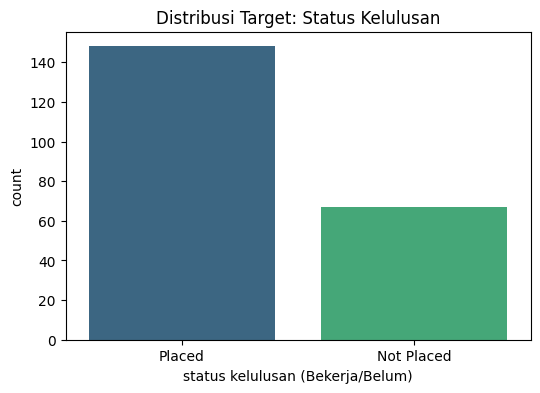

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='status kelulusan (Bekerja/Belum)', data=df, palette='viridis', hue='status kelulusan (Bekerja/Belum)', legend=False)
plt.title('Distribusi Target: Status Kelulusan')
plt.show()

## 2. MENVALIDASI DATA (DATA VALIDATION)

In [ ]:
print("Duplikat:", df.duplicated().sum())
display(df.isnull().sum())

Duplikat: 0


,0
ID,0
Jenis Kelamin,1
Nilai rata-rata SMP,2
Lembaga pendidikan kelas 10,0
Nilai rata-rata SMA,1
Lembaga pendidikan kelas 12,0
Jurusan saat SMA,0
IPK,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0


## 3. Menentukan Objek Data

In [ ]:
target = 'status kelulusan (Bekerja/Belum)'

# Kolom yang tidak dipakai sebagai fitur
# - ID: hanya identifier
# - Gaji: berpotensi data leakage (kalau ada gaji biasanya berarti sudah bekerja)
drop_cols = ['ID', 'Gaji', target]
drop_cols = [c for c in drop_cols if c in df.columns]  # aman kalau ada yang tidak ada

X = df.drop(columns=drop_cols)
y = df[target]

print("Target (y):", target)
print("Jumlah fitur:", X.shape[1])
print("Ukuran X:", X.shape)
print("Ukuran y:", y.shape)

# Cek kolom fitur
display(X.head())

Target (y): status kelulusan (Bekerja/Belum)
Jumlah fitur: 12
Ukuran X: (215, 12)
Ukuran y: (215,)


,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana
0,M,67,Internasional,91,Internasional,Commerce,58,Sci&Tech,No,55,Mkt&HR,58.08.00
1,M,79.33.00,Negeri,78.33.00,Negeri,Science,77.48.00,Sci&Tech,Yes,86.05.00,Mkt&Fin,66.28.00
2,M,65,Negeri,68,Swasta,Arts,64,Comm&Mgmt,No,75,Mkt&Fin,57.08.00
3,M,56,Negeri,52,Swasta,Science,52,Sci&Tech,No,66,Mkt&HR,59.43.00
4,M,85.08.00,Negeri,73.06.00,Negeri,Commerce,73.03.00,Comm&Mgmt,No,96.08.00,Mkt&Fin,55.05.00


In [ ]:
print("Apakah 'Gaji' masih ada di X?", 'Gaji' in X.columns)

Apakah 'Gaji' masih ada di X? False


## 4. Membersihkan Data

In [ ]:
def clean_weird_numeric(series: pd.Series) -> pd.Series:
    """
    Membersihkan format angka string yang aneh seperti '79.33.00' menjadi '79.33'
    dan mengubah menjadi numeric.
    """
    s = series.astype(str).str.strip()
    s = s.replace(['nan', 'None', ''], np.nan)

    # Jika pola seperti 79.33.00 (dua titik) -> buang '.00' terakhir
    s = s.str.replace(r'(\d+)\.(\d+)\.(\d+)$', r'\1.\2', regex=True)

    return pd.to_numeric(s, errors='coerce')

In [ ]:
numeric_cols_to_clean = [
    'Nilai rata-rata SMP',
    'Nilai rata-rata SMA',
    'Nilai tes kemampuan kerja',
    'Gaji'
]

for col in numeric_cols_to_clean:
    if col in df.columns:
        df[col] = clean_weird_numeric(df[col])

df.dtypes

,0
ID,int64
Jenis Kelamin,object
Nilai rata-rata SMP,float64
Lembaga pendidikan kelas 10,object
Nilai rata-rata SMA,float64
Lembaga pendidikan kelas 12,object
Jurusan saat SMA,object
IPK,object
Program studi sarjana,object
Pengalaman kerja sebelum lulus,object


In [ ]:
# Kategorikal: isi modus
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Numerik: isi median (kecuali Gaji)
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    if col != 'Gaji':
        df[col] = df[col].fillna(df[col].median())

# Khusus Gaji: isi 0
if 'Gaji' in df.columns:
    df['Gaji'] = df['Gaji'].fillna(0)

# Cek ulang
df.isnull().sum()

,0
ID,0
Jenis Kelamin,0
Nilai rata-rata SMP,0
Lembaga pendidikan kelas 10,0
Nilai rata-rata SMA,0
Lembaga pendidikan kelas 12,0
Jurusan saat SMA,0
IPK,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0


## 5. Mengkonstruksi Data (Feature Engineering)

In [ ]:
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print("Numerik:", numeric_features)
print("Kategorikal:", categorical_features)

Numerik: []
Kategorikal: ['Jenis Kelamin', 'Nilai rata-rata SMP', 'Lembaga pendidikan kelas 10', 'Nilai rata-rata SMA', 'Lembaga pendidikan kelas 12', 'Jurusan saat SMA', 'IPK', 'Program studi sarjana', 'Pengalaman kerja sebelum lulus', 'Nilai tes kemampuan kerja', 'Pendidikan pascasarjana', 'Nilai rata-rata pascasarjana']


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
X_transformed = preprocess.fit_transform(X)

print("Sebelum transform:", X.shape)
print("Sesudah transform:", X_transformed.shape)

Sebelum transform: (215, 12)
Sesudah transform: (215, 609)


## 6. Membangun Skenario Model

In [ ]:
target = 'status kelulusan (Bekerja/Belum)'

# Buang ID & Gaji dari fitur untuk prediksi status
drop_cols = ['ID', 'Gaji', target]
drop_cols = [c for c in drop_cols if c in df.columns]

X = df.drop(columns=drop_cols)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((161, 12), (54, 12))

## 7. Membangun Model

In [ ]:
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
lr_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=2000))
])

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [ ]:
rf_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        min_samples_split=5,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

## 8. Mengevaluasi Hasil Pemodelan

In [ ]:
print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy Logistic Regression: 0.8518518518518519
              precision    recall  f1-score   support

  Not Placed       0.71      0.88      0.79        17
      Placed       0.94      0.84      0.89        37

    accuracy                           0.85        54
   macro avg       0.83      0.86      0.84        54
weighted avg       0.87      0.85      0.86        54



In [ ]:
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy Random Forest: 0.8148148148148148
              precision    recall  f1-score   support

  Not Placed       1.00      0.41      0.58        17
      Placed       0.79      1.00      0.88        37

    accuracy                           0.81        54
   macro avg       0.89      0.71      0.73        54
weighted avg       0.85      0.81      0.79        54



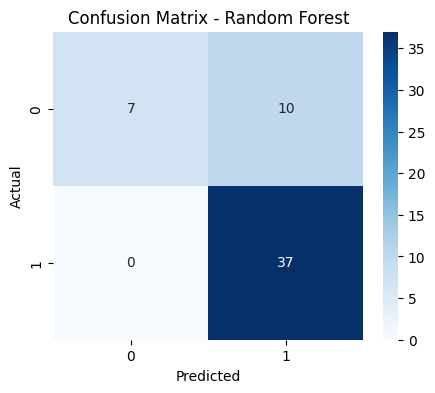

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 9. Review Pemodelan

In [ ]:
from sklearn.model_selection import cross_val_score

cv_lr = cross_val_score(lr_model, X, y, cv=5)
cv_rf = cross_val_score(rf_model, X, y, cv=5)

print("CV mean Logistic Regression:", cv_lr.mean())
print("CV mean Random Forest      :", cv_rf.mean())

CV mean Logistic Regression: 0.874418604651163
CV mean Random Forest      : 0.772093023255814


In [ ]:
print("LR Train Acc:", lr_model.score(X_train, y_train))
print("LR Test  Acc:", lr_model.score(X_test, y_test))

print("RF Train Acc:", rf_model.score(X_train, y_train))
print("RF Test  Acc:", rf_model.score(X_test, y_test))

LR Train Acc: 0.9503105590062112
LR Test  Acc: 0.8518518518518519
RF Train Acc: 0.84472049689441
RF Test  Acc: 0.8148148148148148


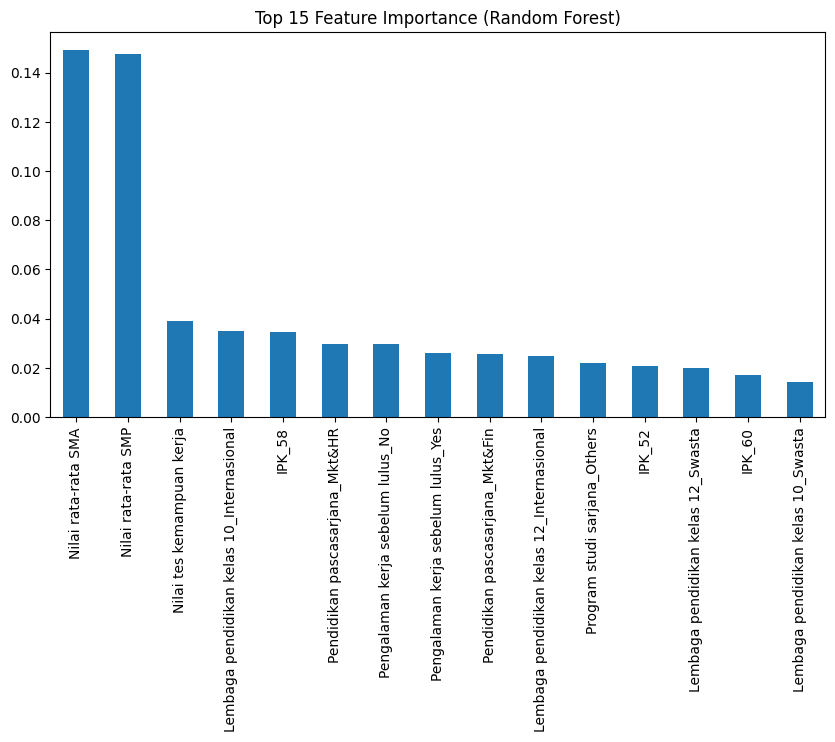

,0
Nilai rata-rata SMA,0.149052
Nilai rata-rata SMP,0.147488
Nilai tes kemampuan kerja,0.039184
Lembaga pendidikan kelas 10_Internasional,0.035143
IPK_58,0.034386
Pendidikan pascasarjana_Mkt&HR,0.029777
Pengalaman kerja sebelum lulus_No,0.029614
Pengalaman kerja sebelum lulus_Yes,0.025974
Pendidikan pascasarjana_Mkt&Fin,0.025435
Lembaga pendidikan kelas 12_Internasional,0.024962


In [ ]:
# Ambil model RF setelah preprocess dijalankan
rf_fitted = rf_model.named_steps['model']
pre = rf_model.named_steps['preprocess']

# Nama fitur setelah one-hot
ohe = pre.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = ohe.get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, cat_feature_names])

importances = rf_fitted.feature_importances_
imp_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,5))
imp_series.head(15).plot(kind='bar')
plt.title("Top 15 Feature Importance (Random Forest)")
plt.show()

imp_series.head(15)